In [76]:
import os,sys,time
import numpy as np
import torch

In [77]:
os.environ['NEURITE_BACKEND'] = 'pytorch'
os.environ['VXM_BACKEND'] = 'pytorch'
import voxelmorph.torch.networks as nets
import voxelmorph.torch.losses as losses_opts
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [45]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [46]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=len(mnist_train), shuffle=False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=len(mnist_test), shuffle=False)

In [47]:
train_data, train_targets = next(iter(train_loader))
test_data, test_targets = next(iter(test_loader))

In [48]:
digit_sel = 5
train_mask = train_targets == digit_sel
test_mask = test_targets == digit_sel

In [49]:

x_train = train_data[train_mask]
y_train = train_targets[train_mask]
x_test = test_data[test_mask]
y_test = test_targets[test_mask]

In [50]:
nb_val = 1000
x_val = x_train[-nb_val:]
y_val = y_train[-nb_val:]
x_train = x_train[:-nb_val]
y_train = y_train[:-nb_val]

In [51]:
nb_vis = 5
idx = np.random.choice(x_train.shape[0], nb_vis, replace=False)

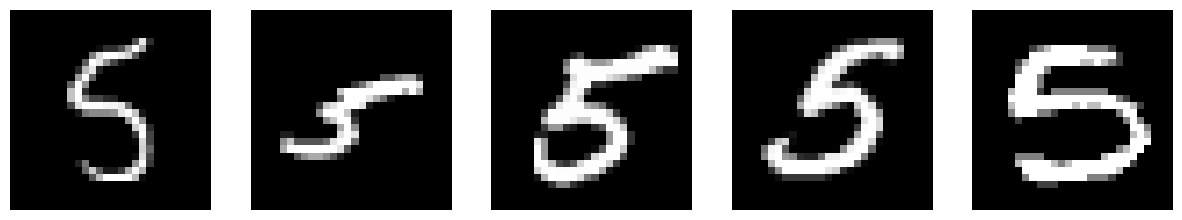

In [52]:
fig, axes = plt.subplots(1, nb_vis, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[idx[i]].squeeze(), cmap='gray')  # .squeeze() removes single-dimensional entries
    ax.axis('off')
plt.show()

In [55]:
x_train.max(),x_train.min()

(tensor(1.), tensor(0.))

In [58]:
ndim=2
unet_input_features=2

In [59]:
x_train.shape

torch.Size([4421, 1, 28, 28])

In [61]:
inshape = (unet_input_features, *x_train.shape[2:])
inshape

(2, 28, 28)

In [62]:
!wget https://surfer.nmr.mgh.harvard.edu/pub/data/voxelmorph/tutorial_data.tar.gz -O data.tar.gz
!tar -xzvf data.tar.gz

--2024-03-06 16:56:30--  https://surfer.nmr.mgh.harvard.edu/pub/data/voxelmorph/tutorial_data.tar.gz
Resolving surfer.nmr.mgh.harvard.edu (surfer.nmr.mgh.harvard.edu)... 132.183.1.43
Connecting to surfer.nmr.mgh.harvard.edu (surfer.nmr.mgh.harvard.edu)|132.183.1.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16644702 (16M) [application/x-gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>]  15.87M  40.2MB/s    in 0.4s    

2024-03-06 16:56:31 (40.2 MB/s) - ‘data.tar.gz’ saved [16644702/16644702]

brain_2d_no_smooth.h5
brain_2d_smooth.h5
brain_3d.h5
fs_rgb.npy
subj1.npz
subj2.npz
tutorial_data.npz


In [63]:
npz = np.load('tutorial_data.npz')
x_train = npz['train']
x_val = npz['validate']

In [71]:
shape=x_train.shape[1:]
shape

(192, 160)

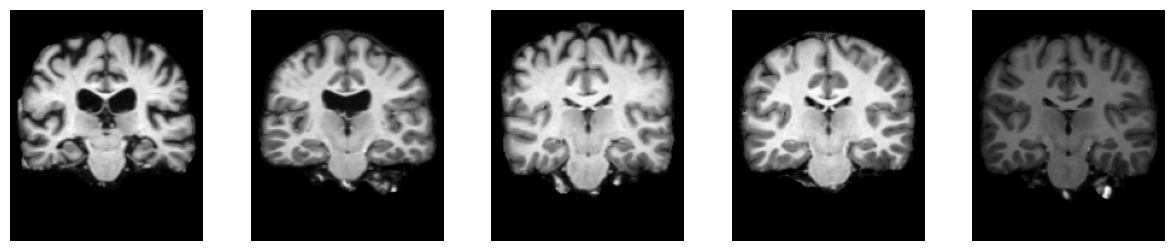

In [72]:
nb_vis = 5
idx = np.random.randint(0, x_train.shape[0], [5,])
example_digits = [f for f in x_train[idx, ...]]

fig, axes = plt.subplots(1, nb_vis, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(example_digits[i].squeeze(), cmap='gray')  # .squeeze() removes single-dimensional entries
    ax.axis('off')

In [73]:
model3=nets.VxmDense(inshape=shape)

In [74]:
model3

VxmDense(
  (unet_model): Unet(
    (encoder): ModuleList(
      (0): ModuleList(
        (0): ConvBlock(
          (main): Conv2d(2, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): LeakyReLU(negative_slope=0.2)
        )
      )
      (1): ModuleList(
        (0): ConvBlock(
          (main): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): LeakyReLU(negative_slope=0.2)
        )
      )
      (2-3): 2 x ModuleList(
        (0): ConvBlock(
          (main): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): LeakyReLU(negative_slope=0.2)
        )
      )
    )
    (decoder): ModuleList(
      (0): ModuleList(
        (0): ConvBlock(
          (main): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): LeakyReLU(negative_slope=0.2)
        )
      )
      (1-3): 3 x ModuleList(
        (0): ConvBlock(
          (main): Conv2d(64, 32, kerne

In [ ]:
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-4)